<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Numerical Solutions (Need)</span></div>

## 1 A Bucket of water

### 1.1 Getting a feel

Text(0.5, 0, 'Time(mins)')

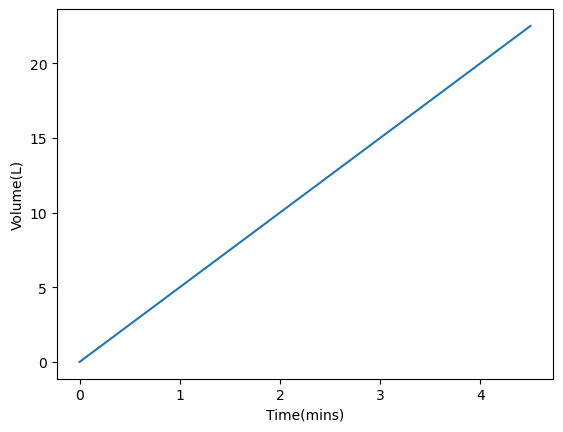

In [1]:
import matplotlib.pyplot as plt

max_time = 5                     # Maximum time (mins)
dt = .5                          # Time step (mins)
rate = 5                         # Rate (L/min)
all_volume = []                  # To keep track of all volumes
volume = 0                       # Starting volume

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)    # Record volume
    dV = rate * dt               # Calculate change in volume
    volume += dV                 # Update the new volume

# Because we can...
plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')

### 1.2 An overflowing bucket

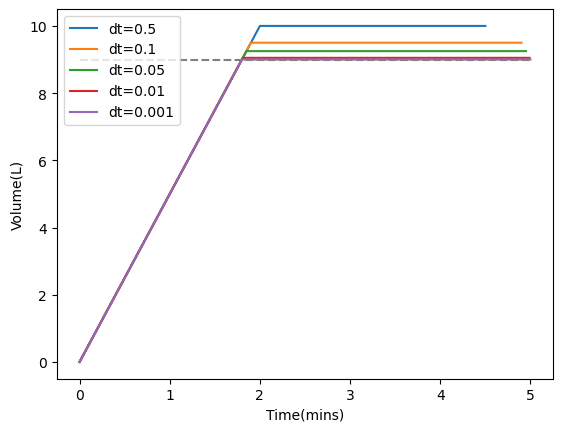

In [6]:
import matplotlib.pyplot as plt

max_time = 5                     # Maximum time (mins)
dt = .5                          # Time step (mins)
rate = 5                         # Rate (L/min)
bucket_capacity = 9              # L

for dt in [0.5, 0.1, 0.05, 0.01, 0.001]:
    all_volume = []                  # To keep track of all volumes
    volume = 0                       # Starting volume

    all_time = np.arange(start=0, stop=max_time, step=dt)

    for time in all_time:
        all_volume.append(volume)
        dV = rate * dt
        if volume <= bucket_capacity:
            volume += dV

    plt.plot(all_time, all_volume, label=f'dt={dt}')

plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')
plt.legend()

### 1.3 A leaky bucket

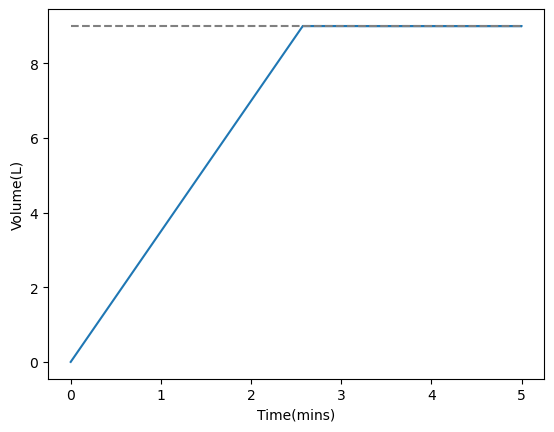

In [7]:
import matplotlib.pyplot as plt

max_time = 5                     # Maximum time (mins)
dt = .001                        # Time step (mins)
rate = 5                         # Filling rate (L/min)
leak_rate = 1.5                  # L/min
bucket_capacity = 9              # L
all_volume = []                  # To keep track of all volumes
volume = 0                       # Starting volume

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)

    dV = rate * dt
    leak_volume = leak_rate * dt
    volume -= leak_volume

    if volume <= bucket_capacity:
        volume += dV             # Update the new volume

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')

### 1.4 Let’s turn off the tap

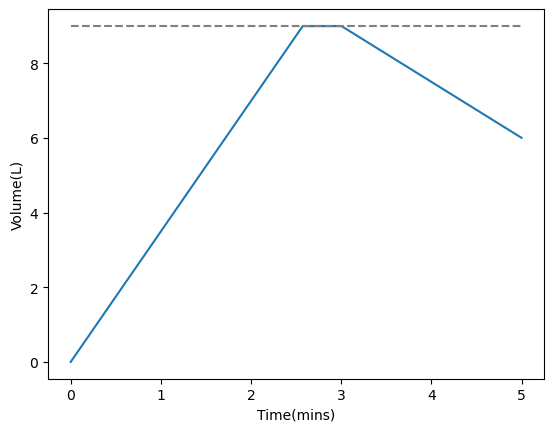

In [8]:
import matplotlib.pyplot as plt

tap_off_time = 3                 # When the tap goes off
max_time = 5                     # Maximum time (mins)
dt = .001                        # Time step (mins)
rate = 5                         # Filling rate (L/min)
leak_rate = 1.5                  # L/min
bucket_capacity = 9              # L
all_volume = []                  # To keep track of all volumes
volume = 0                       # Starting volume

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)
    dV = rate * dt

    leak_volume = leak_rate * dt
    volume -= leak_volume

    if (volume <= bucket_capacity) and (time < tap_off_time):
        volume += dV             

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')

### Using while

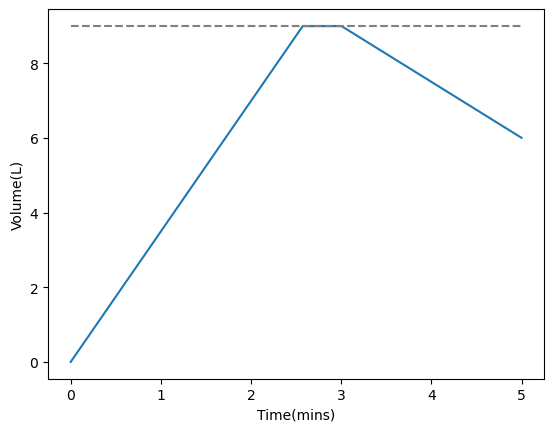

In [9]:
import matplotlib.pyplot as plt

tap_off_time = 3                 # When the tap goes off
max_time = 5                     # Maximum time (mins)
dt = .001                        # Time step (mins)
rate = 5                         # Filling rate (L/min)
leak_rate = 1.5                  # L/min
bucket_capacity = 9              # L
all_volume = []                  # To keep track of all volumes
all_time = []                    # To keep track of all times
volume = 0                       # Starting volume
time = 0

while time <= max_time:
    all_time.append(time)
    all_volume.append(volume)
    dV = rate * dt

    leak_volume = leak_rate * dt
    volume -= leak_volume

    if (volume <= bucket_capacity) and (time < tap_off_time):
        volume += dV    

    time += dt             

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')

### 1.5 A quick summary

1. Establish a relationship that connects the changes of the variables.
1. Pick a starting value
1. Take a step, and calculate the changes.
1. Update the variables
1. Keep on going until you have the desired number of points.
1. If you want to improve accuracy, take smaller steps.

### 1.6 We just solved a differential equation!

In [ ]:

# Your code here


## 2 Simulating Radioactivity

### 2.1 Introduction

In [ ]:

# Your code here


### 2.2 Approximating the differential equation

In [ ]:

# Your code here


### 2.3 Getting a feel

In [ ]:

# Your code here


### 2.4 Let’s write some code

Text(0.5, 0, 'Time(Millions of years)')

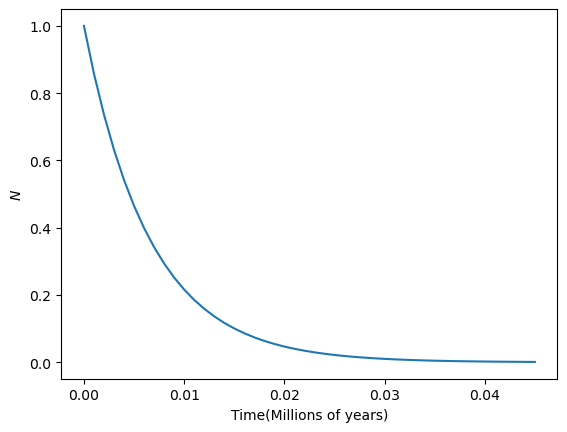

In [1]:
import matplotlib.pyplot as plt

decay_constant = 142       # For 85 Rb (per Myr)
stop_fraction = 1E-3       # stop when the sample has shrunk to
                           # this fraction of the starting value
N0 = 1                     # Starting value of N (in billions of atoms)
dt = .001
time, N = 0, N0            # Starting values

all_N, all_time = [], []

while True:
    all_time.append(time)
    all_N.append(N)

    dN = -decay_constant*N*dt
    N += dN

    if N < N0*stop_fraction:
        break

    time += dt


plt.plot(all_time, all_N)
plt.ylabel('$N$')
plt.xlabel('Time(Millions of years)')

### 2.5 Some things to note about the code

In [ ]:

# Your code here


### 2.6 A quick summary

In [ ]:

# Your code here


## Exercise 1 :  A more realistic leak

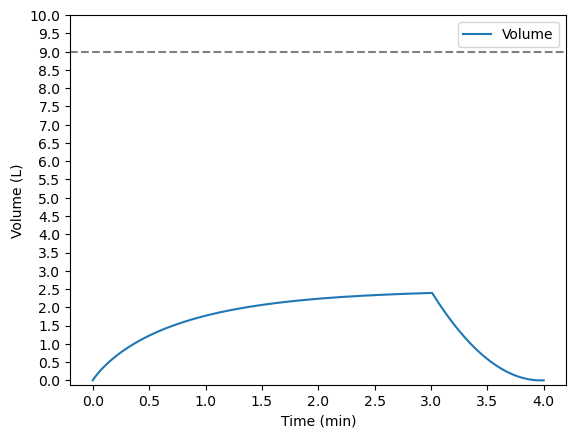

In [31]:
import math
import matplotlib.pyplot as plt

gravity = 9.8 #acceleration due to gravity in m/s2
base = 700 * 10**-4 #area of the base of the bucket in m2
hole = 1 * 10**-4 #area of the hole in m2
fill_rate = 5 #rate at which the bucket is filled in L/min
conversion = 60 * 10**3 #converting m3/s to L/min
leak_rate = lambda h : hole * math.sqrt(2 * gravity * h) * conversion #rate at which water leaks in L/min
minimum = 0 #minimum volume in L
capacity = 9 #maximum volume in L

height = 0 #current height of water in the bucket in m
volume = 0 #current volume of water in the bucket in L

time = 0 #current time in min
dt = 0.01 #increment of time in min
time_off = 3 #time at which tap turns off
time_end = 4 #end time in min

x = [] #all times
y = [] #all volumes

running = True #is the simulation still running

while time <= time_end:
    x.append(time)
    y.append(volume)
    
    volume_fill = fill_rate*dt
    volume_leak = leak_rate(height)*dt
    
    if time < time_off:
        volume += volume_fill
        
        if volume > capacity:
            volume = capacity
    
    if volume - volume_leak >= minimum:
        volume -= volume_leak
    
    height = (volume*(10**-3)) / base
    
    time += dt
        
plt.plot(x, y, label="Volume")
plt.yticks([x/2 for x in range(21)])
plt.xlabel("Time (min)")
plt.ylabel("Volume (L)")
plt.axhline(capacity, color="grey", linestyle="--")
plt.legend()